In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

In [94]:
#loading initial dataset
data = pd.read_csv('03april2018_full.csv')
dataset = deepcopy(data)
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset = dataset.set_index('timestamp')
dataset = dataset[['id_wasp','sensor','value']]

In [95]:
#taking mean from 4 sensors
measures = np.array(data['frame_type'])>0
data_lib = data.iloc[measures,:]
data_lib = data_lib[data_lib['value'].str.contains('Start') == False]
data_lib['value'] = data_lib['value'].astype(float)
data_lib = pd.pivot_table(data_lib, values='value',index='timestamp', columns='sensor', aggfunc='mean')
data_lib.index = pd.to_datetime(data_lib.index)
data_lib = data_lib.drop_duplicates()
arr = np.array(data_lib.index, dtype='datetime64[s]').view('i8')
dates = np.mean(arr.reshape(-1, 4), axis=1).astype('datetime64[s]')
meas = data_lib.groupby(np.arange(len(data_lib))//4).mean()
meas['timestamp'] = dates
data_lib = meas.set_index(['timestamp'])
data_lib = data_lib.drop(columns=['BAT'])

In [96]:
#reprocessing whole dataset
dataset = pd.pivot_table(dataset, values='value',index='timestamp', columns='sensor', aggfunc='first')
dataset.fillna(value=np.nan, inplace=True)
cols_float = ['BAT', 'CO2', 'HUM', 'PRES', 'TC', 'air_cond_HC', 
              'air_cond_state', 'air_in_val1_PV', 'air_in_val1_SP',
              'air_in_val2_PV', 'air_in_val2_SP', 'air_out_val1_PV',
              'air_out_val1_SP', 'air_out_val2_PV', 'air_out_val2_SP',
              'people_number', 'radiator_HC_1', 'radiator_HC_2']
dataset[cols_float] = dataset[cols_float].astype(float)
cols_comma = ['PVT_air_in_H', 'PVT_air_in_T', 'PVT_air_out_H', 'PVT_air_out_T', 'air_in_speed']
for col in cols_comma:
    dataset[col] = dataset[col][pd.notnull(dataset[col])].apply(lambda x: x.replace(',','.'))
    dataset[col] = dataset[col].astype(float)
dataset['door_state'] = dataset['door_state'].replace(to_replace='CLOSE', value=1)
dataset['door_state'] = dataset['door_state'].replace(to_replace='OPEN', value=0)
cols_val = ['radiator_val1', 'radiator_val2', 'radiator_val3']
for col in cols_val:
    dataset[col] = dataset[col].replace(to_replace='FALSE', value=0) #closed
    dataset[col] = dataset[col].replace(to_replace='TRUE', value=1) #opened
dataset = dataset.drop(columns=['aaaaaaaaaaaaaaa','aaaaaaaaaaaaaaaa', 'air_cond_HC',
                      'radiator_HC_1', 'radiator_HC_2', 'air_out_speed', 'BAT', 'STR',
                        'CO2', 'HUM', 'PRES', 'TC'])

In [97]:
#merging datasets
data_merged = data_lib.merge(dataset.dropna(), left_index=True, right_index=True, how='outer')

In [98]:
#data_int.index = pd.to_datetime(data_int.index)
#data_int = dataset.interpolate()
#data_int = data_int.dropna()

In [100]:
data_offset = data_merged[['CO2','HUM','PRES','TC']]

In [102]:
data_offset.index = data_merged.index - np.timedelta64(12, 'm')

In [103]:
data_offset = data_merged.merge(data_offset, left_index=True, right_index=True, how='outer')

In [104]:
data_offset = data_offset.interpolate().dropna()

In [194]:
data_offset

sensor,CO2_x,HUM_x,PRES_x,TC_x,PVT_air_in_H,PVT_air_in_T,PVT_air_out_H,PVT_air_out_T,air_cond_state,air_in_speed,...,air_out_val2_SP,door_state,people_number,radiator_val1,radiator_val2,radiator_val3,CO2_y,HUM_y,PRES_y,TC_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-26 17:31:28,803.086347,8.325277,100761.930833,24.910833,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,816.880522,8.406610,100767.346197,25.067895
2018-01-26 17:31:38,802.062210,8.321886,100762.033819,24.913194,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,817.645409,8.411724,100767.523842,25.071184
2018-01-26 17:31:48,801.038073,8.318495,100762.136806,24.915556,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,818.410296,8.416838,100767.701487,25.074474
2018-01-26 17:31:58,800.013936,8.315104,100762.239792,24.917917,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,819.175182,8.421952,100767.879132,25.077763
2018-01-26 17:32:08,798.989799,8.311713,100762.342778,24.920278,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,819.940069,8.427066,100768.056776,25.081053
2018-01-26 17:32:18,797.965662,8.308322,100762.445764,24.922639,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,820.704956,8.432180,100768.234421,25.084342
2018-01-26 17:33:47,796.941525,8.304932,100762.548750,24.925000,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,821.469842,8.437294,100768.412066,25.087632
2018-01-26 17:33:48,800.000050,8.324015,100763.424375,24.932500,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,822.234729,8.442409,100768.589711,25.090921
2018-01-26 17:33:58,803.058575,8.343099,100764.300000,24.940000,12.4900,19.1000,19.5200,23.6200,0.0,2.7600,...,0.0,1.0,10.0,0.0,0.0,0.0,822.999616,8.447523,100768.767355,25.094211


### Catboost

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from catboost import CatBoostRegressor

import matplotlib.pyplot as plt

In [134]:
labels_cols

['CO2_y', 'HUM_y', 'PRES_y', 'TC_y']

In [183]:
features_cols = data_offset.columns.tolist()[:-4]
features_cols.remove('TC_x')
labels_cols = data_offset.columns.tolist()[-4:]

x_train, x_test, y_train, y_test = train_test_split(data_offset.loc[:,features_cols], data_offset.loc[:,labels_cols],
                                                                                    test_size=0.2, shuffle=False)
scale_x = MinMaxScaler()
scale_y = MinMaxScaler()
x_train = scale_x.fit_transform(x_train)
y_train = scale_y.fit_transform(y_train)
x_test = scale_x.transform(x_test)
y_test = scale_y.transform(y_test)

In [184]:
cat = CatBoostRegressor()
cat.fit(x_train, y_train[:,3], verbose=False)

In [185]:
y_pred = cat.predict(x_test)

In [186]:
y_shit_scale = np.vstack((np.vstack((y_pred,y_pred)),np.vstack((y_pred,y_pred)))).T

In [187]:
mean_squared_error(y_test[:,3], y_pred)

0.0030189473858032766

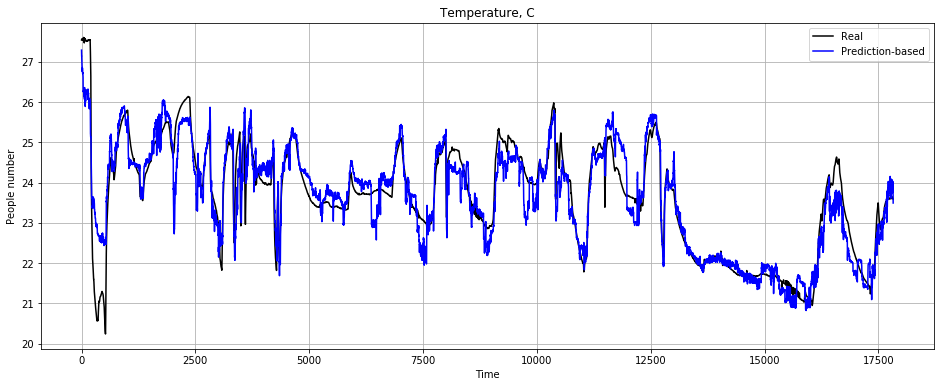

In [188]:
plt.figure(figsize=(16,6))
plt.plot(scale_y.inverse_transform(y_test)[:,3], 'k', label='Real')
plt.plot(scale_y.inverse_transform(y_shit_scale)[:,3], 'b', label='Prediction-based')
plt.legend()
plt.title('Temperature, C')
plt.xlabel('Time')
plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

## Support Vector Machine

In [161]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train[:,3])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [162]:
svr_pred = svr.predict(x_test)

In [163]:
mean_squared_error(y_test[:,3], svr_pred)

0.0017523331488852156

In [165]:
svr_shit_scale = np.vstack((np.vstack((svr_pred,svr_pred)),np.vstack((svr_pred,svr_pred)))).T

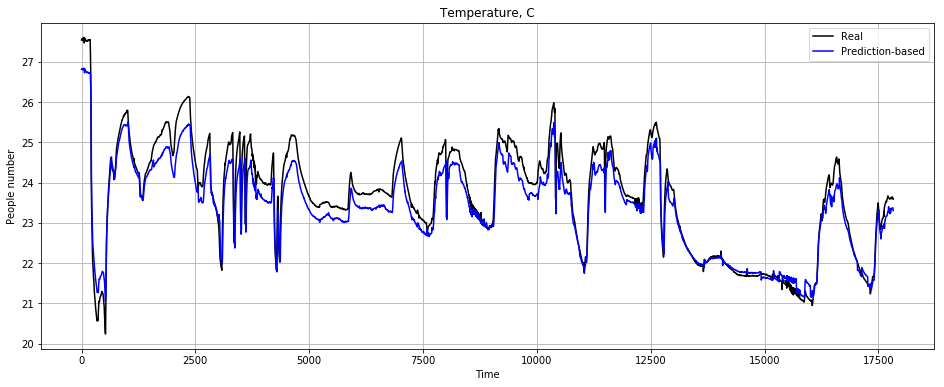

In [166]:
plt.figure(figsize=(16,6))
plt.plot(scale_y.inverse_transform(y_test)[:,3], 'k', label='Real')
plt.plot(scale_y.inverse_transform(svr_shit_scale)[:,3], 'b', label='Prediction-based')
plt.legend()
plt.title('Temperature, C')
plt.xlabel('Time')
plt.ylabel('People number')
#plt.ylim([0,1])
#plt.xlim([0,100])
plt.grid()
plt.show()

## Sensitivity analysis

In [125]:
from SALib.analyze import sobol as sobol_analyzer
from SALib.analyze import morris as morris_analyzer

from SALib.sample import saltelli as saltelli_sampler
from SALib.sample import morris as morris_sampler

In [190]:
bounds = np.hstack((np.array(x_train.min()).reshape(-1,1),np.array(x_train.max()).reshape(-1,1)))

In [191]:
problem = {
    'num_vars': 22,
    'names': features_cols,
    'bounds': bounds,
    'groups': None
    }

In [192]:
x_sat = saltelli_sampler.sample(problem, 250)
y1, y2, y3 = np.zeros(x_sat.shape[0]), np.zeros(x_sat.shape[0]), np.zeros(x_sat.shape[0])

for i, xi in enumerate(x_sat):
    xi = xi.reshape(1, -1)
    y1[i] = cat.predict(xi)
    #y2[i] = svr.predict(xi)
    
sobol_1 = sobol_analyzer.analyze(problem, y1, conf_level=0.97)
#sobol_2 = sobol_analyzer.analyze(problem, y2, conf_level=0.97)

In [193]:
np.vstack((features_cols, sobol_1['ST'])).T

array([['CO2_x', '0.028378371001071368'],
       ['HUM_x', '0.3082930568755686'],
       ['PRES_x', '0.04322863884871801'],
       ['PVT_air_in_H', '0.04705420264205996'],
       ['PVT_air_in_T', '0.09419663509954052'],
       ['PVT_air_out_H', '0.026549910307925546'],
       ['PVT_air_out_T', '0.5405701733502322'],
       ['air_cond_state', '0.001430555455935074'],
       ['air_in_speed', '0.04193383609686116'],
       ['air_in_val1_PV', '0.003157488350048211'],
       ['air_in_val1_SP', '3.72877563487039e-05'],
       ['air_in_val2_PV', '8.583159519302473e-05'],
       ['air_in_val2_SP', '1.3032064640378172e-05'],
       ['air_out_val1_PV', '0.006456273909772404'],
       ['air_out_val1_SP', '1.357598591470829e-05'],
       ['air_out_val2_PV', '0.05896800508603698'],
       ['air_out_val2_SP', '0.000116529780260938'],
       ['door_state', '0.0012274456922372803'],
       ['people_number', '0.004043408608186324'],
       ['radiator_val1', '0.0008907972520424699'],
       ['radiator_v

In [169]:
np.vstack((features_cols, sobol_2['ST'])).T

array([['CO2_x', '0.025122643663195218'],
       ['HUM_x', '0.01510768126863339'],
       ['PRES_x', '0.0003121235774019851'],
       ['TC_x', '0.9046165152579717'],
       ['PVT_air_in_H', '0.011096700172621606'],
       ['PVT_air_in_T', '0.004231524537603874'],
       ['PVT_air_out_H', '0.0014213241720220952'],
       ['PVT_air_out_T', '0.03350727925063166'],
       ['air_cond_state', '0.0019021240212379663'],
       ['air_in_speed', '0.0005175288070738548'],
       ['air_in_val1_PV', '0.0001773578132288151'],
       ['air_in_val1_SP', '0.00021445078872696922'],
       ['air_in_val2_PV', '9.784185135317864e-05'],
       ['air_in_val2_SP', '0.0002336889975575993'],
       ['air_out_val1_PV', '0.00019312125597998464'],
       ['air_out_val1_SP', '0.0002888951700863573'],
       ['air_out_val2_PV', '0.0008963802560282664'],
       ['air_out_val2_SP', '0.0002827677509784677'],
       ['door_state', '0.00028785525653768774'],
       ['people_number', '0.003669331928784431'],
       ['radi